# 03. PyTorch Computer Vision

**Computer Vision and Convolutional Neural Networks with PyTorch 🔥**

## Inputs and Outputs in Computer Vision

![](images/inputsandoutputs.gif)

`Convolutional Neural Networks (CNN)` are good are recognizing patterns in an Image.

<span style="font-size: 24px;">
🧑‍💻 Let's Code !!!
</span>

## Computer Vision Libraries in PyTorch

1. `torchvision` - base domain library for PyTorch computer vision
2. `torchvision.datasets` - get datasets and data loading functions for computer vision
3. `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
4. `torchvision.transform` - functions for manipulating your vision data (images) to be suitable for use with a ML model
5. `torch.utils.data.Dataset` - base dataset class for PyTorch
6. `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# Imports

# import torch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions
print('torch: ', torch.__version__)
print('torchvision: ', torchvision.__version__)

torch:  2.0.1
torchvision:  0.15.2


## 1. Getting a Dataset

https://pytorch.org/vision/main/datasets.html

The dataset we will be using [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
- Grayscale image of clothing.

In [2]:
# setup training data
train_data = datasets.FashionMNIST(
    download=True, # do we want to download the data
    root='data', # where to download the data to
    train=True, # do we want the training data?
    transform=torchvision.transforms.ToTensor(), # how do you want to transform the data
    target_transform=None # how do you want to transform the target/label
)
# setup testing data
test_data = datasets.FashionMNIST(
    download=True,
    root='data',
    train=False,
    transform=ToTensor(),
    target_transform=None
)

In [35]:
len(train_data), len(test_data)

(60000, 10000)

In [36]:
# first image
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.1 Check input and output shapes of data

In [38]:
# check the shape
print(f'Image shape: [color_channels, height, width]: {image.shape}')
print('label:', label)

Image shape: [color_channels, height, width]: torch.Size([1, 28, 28])
label: 9


### 1.2 Visualizing our data

In [39]:
image. label = train_data[0]
print('Image shape:', image.shape)

Image shape: torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

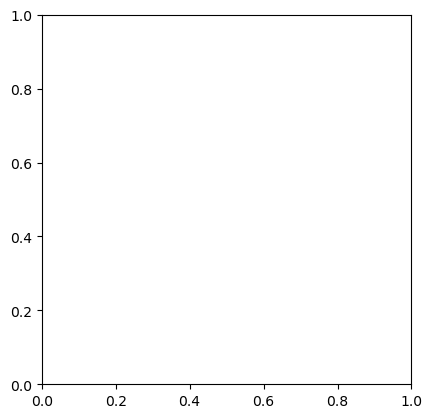

In [40]:
#plotting the data
plt.imshow(image)

**`The Invalid Shape` issue**

<div class='alert alert-danger'>
    We have a shape issue. This is one the most common issue we can find in PyTorch 
</div>

**We can solve it by doing `image.squeeze()`.**

- squeeze will remove the extra dimension with 1

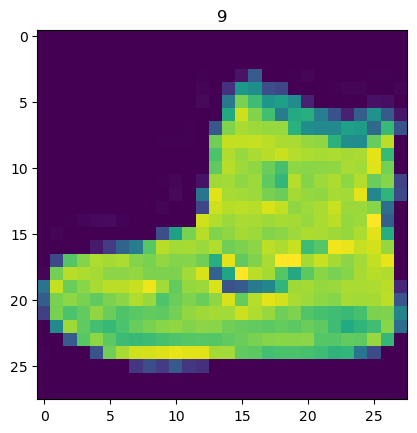

In [30]:
plt.imshow(image.squeeze())
plt.title(label); # squeeze will remove the extra dimension with 1

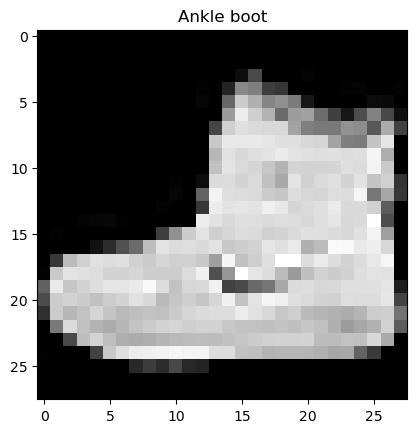

In [32]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]); # squeeze will remove the extra dimension with 1

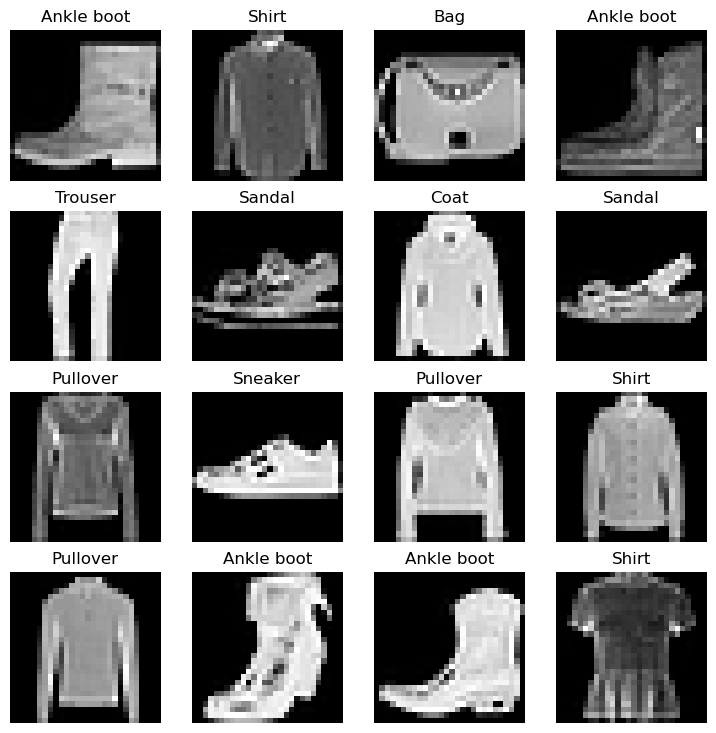

In [55]:
# plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i) # i is the position to show the image at
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [58]:
print(torch.randint(0, len(train_data), size=[1]))

torch.randint(0, len(train_data), size=[1]).item()

tensor([24706])


29749

In [61]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

We have to convert the pytorch datasets to Dataloader.

`DataLoader` turns our dataset into a `Python iterable`.

More, specifically, we want to turn our data into `batches` or `mini-batches`

<p style="font-size: 20px;">But, Why would we do this? 🤔</p>

1. It is more `computationally efficient`, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to `32` images a titme (`batch size of 32`)
2. It gives our neural network more chancces to update its gradient per epoch.

In [3]:
from torch.utils.data import DataLoader

# setup the batch siez hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x117a73b50>,
 <torch.utils.data.dataloader.DataLoader at 0x117a73cd0>)

In [71]:
# let's check out what we've created
print(f'Length of train_dataloader: {len(train_dataloader)} baches of size {BATCH_SIZE}')
print(f'Length of test_dataloader: {len(test_dataloader)} baches of size {BATCH_SIZE}')


Length of train_dataloader: 1875 baches of size 32
Length of test_dataloader: 313 baches of size 32


In [72]:
60000/32, 10000/32

(1875.0, 312.5)

This means that our models is gonna look at 1875 batches of 32 images at a time instead of looking at all data at the same time.

In [4]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### 2.1. Select a random image

Image Size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


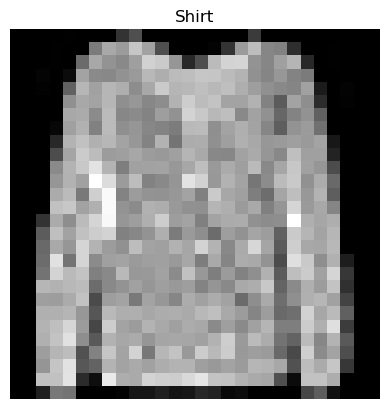

In [7]:
# show a sample
torch.manual_seed(32)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image Size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modeling experiments, `it's a best practice to start with a baseline model`.

`A baseline model` is a simple model you will try and improve upon with subsequent models/experiments.

In other words: `start simply and add complexity when necessary`

In [8]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x= train_features_batch[0]

# flatten the sample
output = flatten_model(x)

# print out what happened
print(f'Shape before flattening {x.shape} <- [color_channels, height, width]')
print(f'Shape after flattening {output.shape} <- [color_channels, height*width]')

Shape before flattening torch.Size([1, 28, 28]) <- [color_channels, height, width]
Shape after flattening torch.Size([1, 784]) <- [color_channels, height*width]


In [9]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [10]:
torch.manual_seed(42)
# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # 28x28,
    hidden_units = 10, # how many units in the hidden layer
    output_shape = len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [101]:
dummy_x = torch.rand([1, 28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

💡 Creating a dummy data and checking the output is the great way to see if our model is working correctly.

In [102]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer, and evaluation metrics

* `Loss Function` - Since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* `Optimizer` - we can select `torch.optim.SGD()` Stochastic Gradient Descent,
  - Adam optimzer can be an option as well
import sys
sys.path.append("..")* `Evaluation Metic` - Since we're working on a classification problem, let's use accuracy as our evaluation metrics

In [11]:
import sys
sys.path.append('..')

# import accuracy metric
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

### 3.2. Creating a function to time our experiments.

Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy value)
2. How fast it runs.

In [12]:
from timeit import default_timer as timer

def print_train_time(start, end, device = None):
    """
    Print difference between start and end timer
    """
    total_time  = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    
    return total_time

In [13]:
start_time = timer()
#somecode
end_time = timer()
print_train_time(start_time, end_time)

Train time on None: 0.000 seconds


3.675097832456231e-05

### 3.3 Creating a training loop
*and training the model in `batches` of data*

1. Loop through epochs and use `tqdm` for progress bar.
2. Loop through training atches, perform training steps, calculate the trainin loss *per batch*
3. Loop through tresting batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening
5. Time it all (for fun)

<div class='alert alert-info'>
   The optimizer with update a model's parameter once per batch rather than once per epoch...
</div>

In [14]:
# import tqdm for progress bar
from tqdm.auto import tqdm
#tqdm.auto will recognize what computer environment we are using and gives 
# us the best type of progress bar for us
# jupyter notebook progress bar is different from python script

# set the seed and start the timer
torch.manual_seed(42)
train_start_time_on_cpu = timer()

# set the number of epochs (we'll keep small for faster training time)
epochs = 3

# create training and test loop

for epoch in tqdm(range(epochs)):
    print(f'epoch: {epoch}\n ------')

    # training
    train_loss = 0

    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()

        # forward pass
        y_pred = model_0(X)

        calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # acculate the loss for this batch

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer.step()

        # print out what's happening
        if batch % 400 == 0:
            print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')
    # calculate the average train loss per epoch
    train_loss /= len(train_dataloader)
    # testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            #forward pass
            test_pred = model_0(X_test)

            # caculate the loss
            test_loss += loss_fn(test_pred, y_test)

            # calculate the accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        # calculate the average test loss per batch
        test_loss /= len(test_dataloader)

        # calculate the average test acc per batch
        test_acc /= len(test_dataloader)
        
        # print out what's happening
        print(f'\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} , Test acc: {test_acc:.4f}')

    #calcuate the time
    train_end_time_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start=train_start_time_on_cpu,
                                                end=train_end_time_on_cpu,
                                                device=str(next(model_0.parameters()).device))
    

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
 ------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.5904 | Test Loss: 0.5095 , Test acc: 82.0387
Train time on cpu: 6.659 seconds
epoch: 1
 ------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.4763 | Test Loss: 0.4799 , Test acc: 83.1969
Train time on cpu: 13.279 seconds
epoch: 2
 ------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.4550 | Test Loss: 0.4766 , Test acc: 83.4265
Train time on cpu: 19.894 seconds


## 4. Make Predictions and get Model 0 Models

In [15]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    """
    loss, acc = 0, 0

    model.eval()
    with torch.inference_mode():            
        print("Evaluating...")
        for X,y in tqdm(data_loader):
            #make predictions
            y_pred = model(X)

            # accumulate the loss and acc values per batch
            loss +=loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y, y_pred = y_pred.argmax(dim=1))

        # Average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {
        'model_name': model.__class__.__name__, # only works after the model is created
        'model_loss': loss.item(),
        'model_acc': acc
    }


model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

Evaluating...


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code (for using GPU if available)

In [16]:
device = (
    'cuda' if torch.cuda.is_available() 
    # else 'mps' if torch.backends.mps.is_available() 
    else 'cpu'
)
device

'cpu'

## 6. Model 1
Building a model with non-linearity

In [30]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, 
                input_shape:int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.sequential_layer = (
            nn.Sequential(
                nn.Flatten(),
                nn.Linear(in_features=input_shape, out_features=hidden_units),
                nn.ReLU(),
                nn.Linear(in_features=hidden_units, out_features=output_shape),
                nn.ReLU()
            )
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.sequential_layer(x)

model_1 = (
    FashionMNISTModelV1(784, 10, len(class_names))
).to(device)
model_1

FashionMNISTModelV1(
  (sequential_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1. Setup a loss and an optimizer

In [36]:
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1) # tries to update our model's parameters to reduce the loss

### 6.2. Functionizing Training and Evaluation/Testing Loop

Let's create a function for:
- training loop - `train_step()`
- testing loop - `test_step()`

In [50]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """
    Performs a training with model trying to learn on data_loader.
    """
    train_loss, train_acc = 0, 0

    # put model into training mode
    model.train()
    
    for batch, (X,y) in enumerate(data_loader):
        # put data in target device
        X, y = X.to(device), y.to(device)
        
        # forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        # calculate loss and acc
        loss = loss_fn(y_pred, y)
        acc = accuracy_fn(y_true=y, 
                          y_pred = y_pred.argmax(dim=1)) # go from logits -> predicted label
        train_loss += loss # acculate the loss for this batch
        train_acc += acc # accumulate the accu for this batch

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer.step()

    # Devide total train loss and acc by length fo train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    # print out what's happening
    print(f'\nTrain Loss: {train_loss:.5f} |Train acc: {test_acc:.5f}')

    
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    """
    Performs a test to the model trying to test the data_loader
    """
    # put the model in evaluatio mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        test_loss, test_acc = 0,0
        for X_test, y_test in data_loader:
            # put X and y on target device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # forward pass
            test_pred = model(X_test) # return logits

            # calculate loss and acc
            loss = loss_fn(test_pred, y_test)
            acc = accuracy_fn(y_true = y_test, y_pred=test_pred.argmax(dim=1))
            test_loss += loss
            test_acc += acc
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    print(f'Testing Loss: {test_loss} | Acc {test_acc}')

In [53]:
# using training and test step function for the training and testing

torch.manual_seed(42)

# measure time
from timeit import default_timer as timer

train_time_start_on_target_device = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} ------")
    train_step(model=model_1, 
               data_loader=train_dataloader, 
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model = model_0,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
    
train_time_end_on_target_device = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_target_device,
                                            end = train_time_end_on_target_device,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 ------

Train Loss: 0.39926 |Train acc: 84.30511
Testing Loss: 0.47663894295692444 | Acc 83.42651757188499
Epoch: 1 ------

Train Loss: 0.39290 |Train acc: 84.30511
Testing Loss: 0.47663894295692444 | Acc 83.42651757188499
Epoch: 2 ------

Train Loss: 0.38722 |Train acc: 84.30511
Testing Loss: 0.47663894295692444 | Acc 83.42651757188499
Train time on cpu: 20.222 seconds


**Note:** Sometimes, dependin gon your data/hardware you might find that your model trains faser on CPU than GPU.

**Why is this?**
1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. THe hardware you're usin ghas a better CPU in terms of computing capability than the GPU.

For more on how to make your models compute faster, read the article: https://horace.io/brrr_intro.html

In [54]:
# get model_1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

Evaluating...


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.43456149101257324,
 'model_acc': 84.85423322683707}

In [55]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 7. Model 2: Building a Convolutional Neural Network (CNN)

`CNN`'s are also known as `ConvNets`

CNN's are `known for` their capabilities to find `patterns in visual data`.

To find out what's happening inside a CNN, go to this website: https://poloclub.github.io/cnn-explainer/

In [127]:
#create a p neural network

class FashionMNISTMODELV2(nn.Module):
    """
    Model that replicates the TinyVGG architecture from CNN explorer website
    """

    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # hidden_units * ? * ?
                      out_features=output_shape)
        )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print('Output shape of conv1:', x.shape)
        x = self.conv_block_2(x)
        # print('Output shape of conv2:', x.shape)
        x = self.classifier(x)
        # print('Output shape of classifier', x.shape)
        
        return x

In [128]:
torch.manual_seed(42)

model_2 = FashionMNISTMODELV2(input_shape=1,  # number of color channels
                              hidden_units=10,
                              output_shape = len(class_names)).to(device)
# model_2

In [110]:
torch.manual_seed(42)

random_image = torch.randn(size=(1,28,28))
print(f'Random Image shape: {random_image.shape}')

random_image_after_conv1 = model_2.conv_block_1(random_image)
print(f'Shape of image after conv 1: {random_image_after_conv1.shape}')
random_image_after_conv2 = model_2.conv_block_2(random_image_after_conv1)
print(f'Shape of image after conv 2: {random_image_after_conv2.shape}')

Random Image shape: torch.Size([1, 28, 28])
Shape of image after conv 1: torch.Size([10, 14, 14])
Shape of image after conv 2: torch.Size([10, 7, 7])


match the output of conv layer 2 with the linear layer in feature

here in_features = 10*7*7

`10` is the hidden units size 

7*7,  we need to put manually

> self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=`hidden_units*7*7`, # hidden_units * ? * ?
                      out_features=output_shape)
        )

In [111]:
# pass img through the model
model_2(img.unsqueeze(0))

Output shape of conv1: torch.Size([1, 10, 14, 14])
Output shape of conv2: torch.Size([1, 10, 7, 7])
Output shape of classifier torch.Size([1, 10])


tensor([[ 0.0329, -0.0670,  0.0534, -0.0337, -0.0110,  0.0165, -0.0050, -0.0113,
          0.0245,  0.0092]], grad_fn=<AddmmBackward0>)

### 7.1. Stepping through `nn.Conv2d()`

In [63]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(32, 3,64,64)
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single Image Shape: {test_image.shape}')
print(f'Test Image: {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])
Test Image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [69]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=10, 
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)
# Pass the data through convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-0.4103, -0.5068,  0.9644,  ...,  0.6960, -0.0081,  0.6020],
         [ 0.0467,  0.8329, -1.4136,  ..., -0.2810,  1.1271, -0.0278],
         [ 0.5392, -1.0859, -0.0669,  ...,  0.1328,  0.0142,  0.8150],
         ...,
         [-0.4883,  1.2388, -0.3558,  ..., -0.3409, -0.4921,  0.3079],
         [-0.3344, -0.0649, -0.0280,  ..., -0.0478, -0.7178,  0.3228],
         [ 0.4608, -0.1360,  0.5038,  ...,  0.2493, -1.2336, -0.0082]],

        [[-1.0391, -1.2402,  1.1575,  ..., -0.2089, -0.1993, -0.2307],
         [-0.1979, -0.2104, -0.7991,  ..., -0.0536,  0.5827, -0.4988],
         [-0.5856, -0.3684,  0.3043,  ..., -0.6935,  1.0387,  0.1609],
         ...,
         [-0.0320,  0.7160,  0.4218,  ..., -0.9014, -0.0952,  0.6352],
         [ 0.4257, -0.8310,  0.9764,  ..., -0.4652,  0.3195, -0.4208],
         [ 0.2081, -0.2335, -0.0649,  ...,  0.6992, -0.1542,  1.3336]],

        [[-1.7688,  0.3536, -1.2540,  ..., -0.6188, -1.1902,  0.0516],
         [ 0.2664, -0.4323,  0.2613,  ..., -0

### 7.2. Stepping through `nn.MaxPoo.2d()`

In [70]:
print(f'Test Image original shape: {test_image.shape}')

Test Image original shape: torch.Size([3, 64, 64])


In [73]:
# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f'Shape after going through convconv_layer(): {test_image_through_conv.shape}')

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through max pool layer(): {test_image_through_conv_and_max_pool.shape}')

Shape after going through convconv_layer(): torch.Size([10, 62, 62])
Shape after going through max pool layer(): torch.Size([10, 31, 31])


In [77]:
torch.manual_seed(42)

# create a random tensor with a similar number of dimentions in our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f'\nRandom tensor: \n {random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor to the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor: \n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')


Random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and an optimizer for model 2

In [129]:
# setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.1)

### 7.4 Setup Train and Test Loop

In [130]:
# import tqdm for progress bar
from tqdm.auto import tqdm

#import timer for to record the time
from timeit import default_timer as timer

train_start_time = timer()

torch.manual_seed(42)

epochs = 3

for epochs in tqdm(range(epochs)):
    print(f'\nEpoch: {epochs}\n___')

    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_end_time = timer()


total_train_time_model_2 = print_train_time(start=train_start_time,
                                            end=train_end_time,
                                            device=device)
    

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
___

Train Loss: 0.58781 |Train acc: 84.30511
Testing Loss: 0.4089137315750122 | Acc 85.16373801916933

Epoch: 1
___

Train Loss: 0.36143 |Train acc: 84.30511
Testing Loss: 0.35511189699172974 | Acc 86.82108626198082

Epoch: 2
___

Train Loss: 0.32243 |Train acc: 84.30511
Testing Loss: 0.3161371350288391 | Acc 88.55830670926518
Train time on cpu: 39.491 seconds


In [133]:
# get model 2 results
model_2_results = eval_model(
    model = model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

Evaluating...


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.3161371350288391,
 'model_acc': 88.55830670926518}

In [136]:
print(model_0_results)
print()
print(model_1_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}

{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.43456149101257324, 'model_acc': 84.85423322683707}


## 8. Compare model reuslts and training time

In [137]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.434561,84.854233
2,FashionMNISTMODELV2,0.316137,88.558307


In [138]:
# add training time to the results comparison
compare_results['training_time'] = [total_train_time_model_0, 
                                    total_train_time_model_1, 
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,20.253864
1,FashionMNISTModelV1,0.434561,84.854233,20.222383
2,FashionMNISTMODELV2,0.316137,88.558307,39.491232


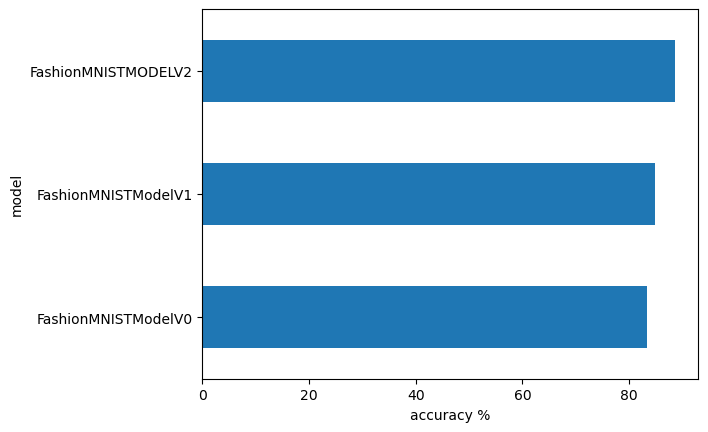

In [140]:
# visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy %')
plt.ylabel('model');

In [175]:
# test_feature_batch, test_labels_batch = next(iter(test_dataloader))
# print(f'shape of test feature batch: {test_feature_batch.shape}')
# print(f'shape of test labels batch: {test_labels_batch.shape}')

## 9. Make predictions and Evaluate random image with a best model

### Get random images from test_data

In [219]:
import random
random.seed(42)
test_samples = [] # we want a list of samples to iterate through
test_labels = [] # to compare witht he ground truth

# get 9 samples from the test data
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape
test_samples[0].shape, test_labels[0]

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Ankle boot')

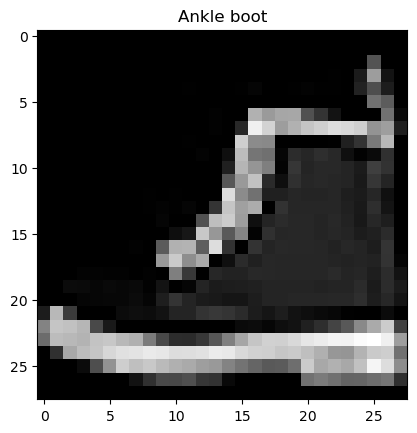

In [220]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

### Make predictions

In [207]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0)

            # Forward pass (model outputs raw logits)
            pred_logits = model(sample)

            # get prediction probability (logits -> prediction prob)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs) # concatenate everything in the list to the single tensor

In [221]:
preds_probs = make_predictions(model=model_2,
                               data=test_samples)

# View first two prediction probabilities
preds_probs[:2]

tensor([[4.4433e-05, 3.2681e-05, 3.4904e-05, 1.9031e-04, 2.7915e-05, 4.9642e-03,
         4.9197e-05, 1.1671e-02, 3.0146e-02, 9.5284e-01],
        [1.1341e-04, 5.5577e-06, 6.3838e-05, 6.2948e-06, 7.3456e-06, 2.6894e-03,
         1.8300e-05, 9.7447e-01, 7.8957e-04, 2.1836e-02]])

In [209]:
# convert prediction probabilities into labels

pred_classes = preds_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [210]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

### Plot predictions

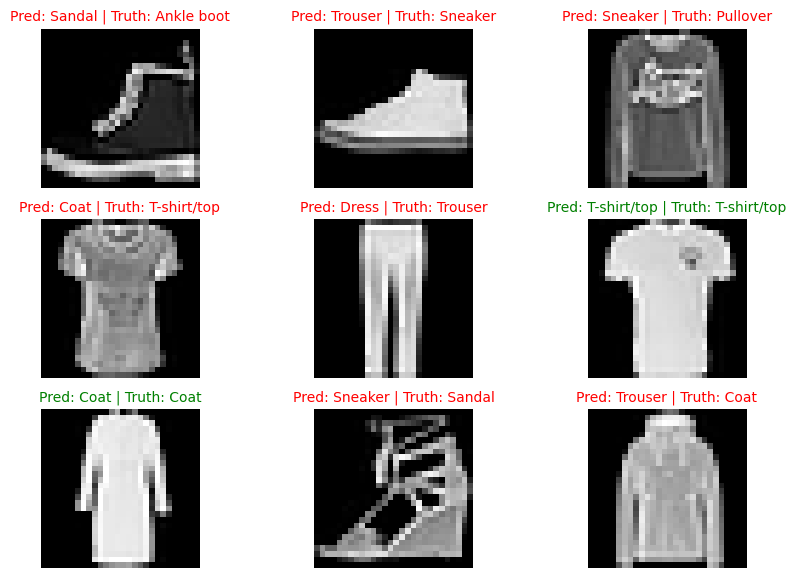

In [222]:
plt.figure(figsize=(10,7))
nrows, ncols = 3,3

for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows, ncols, i+1)

    # plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # find the predictions
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    
    plt.axis(False)


## 10. Making a consusion matrix

for further precition evaluation

***A confusion matrix is the fantastic way of evaluating your classification models visually***

Here, we will:
1. Make predictions with our trained model on the ltest dataset
2. Make a confusion matrix with `torchmetrics.confusionmatrix`
3. Plot a consusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [239]:
# import tqdm.auto 
from tqdm.auto import tqdm

# 1. Make prediction with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making Predictions...'):
        # send the data and targets to target device
        X, y = X.to(device), y.to(device)

        # do the forward pass
        y_logits = model_2(X)

        # Turn logits -> predict probabilities -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())
# concatenate list of prediction into a tensor
y_preds_tensor = torch.cat(y_preds) # turns list of predictions into single tensor
print(y_preds_tensor)

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])


In [226]:
import torchmetrics

In [231]:
# install required package, if not install, install them.
try:
    import mlxtend
    print(mlxtend.__version__)
    assert int(mlxtend.__version__.split('.')[1]) >=19, 'mlxtend version should be >= 0.19.0'
except:
    print('Installing...')
    !pip install -q mlxtend
    import mlxtend
    print(mlxtend.__version__)
    

0.23.1


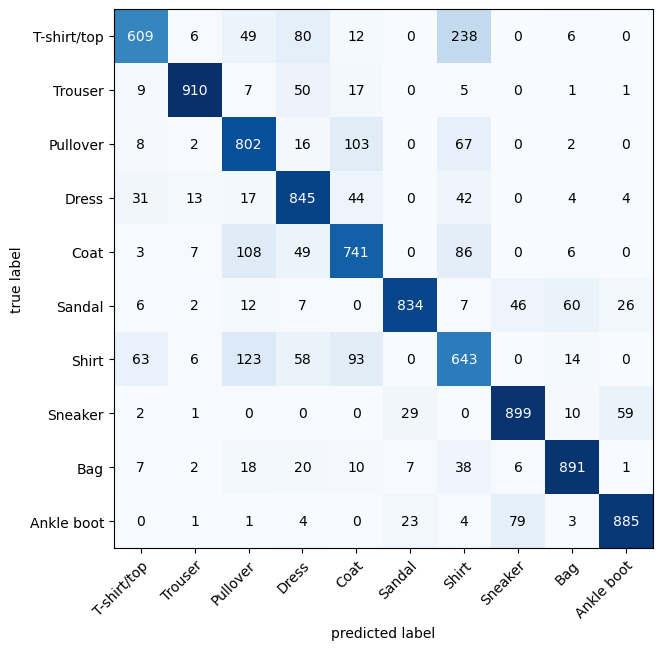

In [242]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. make a confusion metrics using torchmetrics.ConfusionMatrix
conf_mat = ConfusionMatrix(task='multiclass', 
                           num_classes = len(class_names))
conf_mat_tensor = conf_mat(preds = y_preds_tensor,
                          target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize=(10,7)
)

In [243]:
conf_mat_tensor

tensor([[609,   6,  49,  80,  12,   0, 238,   0,   6,   0],
        [  9, 910,   7,  50,  17,   0,   5,   0,   1,   1],
        [  8,   2, 802,  16, 103,   0,  67,   0,   2,   0],
        [ 31,  13,  17, 845,  44,   0,  42,   0,   4,   4],
        [  3,   7, 108,  49, 741,   0,  86,   0,   6,   0],
        [  6,   2,  12,   7,   0, 834,   7,  46,  60,  26],
        [ 63,   6, 123,  58,  93,   0, 643,   0,  14,   0],
        [  2,   1,   0,   0,   0,  29,   0, 899,  10,  59],
        [  7,   2,  18,  20,  10,   7,  38,   6, 891,   1],
        [  0,   1,   1,   4,   0,  23,   4,  79,   3, 885]])

## 11. Save and load the best performing model

In [249]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = '01_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(), 
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_computer_vision_model_2.pth


In [251]:
# loading the saved model

# create new instance of the model class

loaded_model_2 = FashionMNISTMODELV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2


FashionMNISTMODELV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [252]:
model_2_results

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.3161371350288391,
 'model_acc': 88.55830670926518}

In [253]:
# Evaluate loaded model

torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)
loaded_model_2_results

Evaluating...


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.3161371350288391,
 'model_acc': 88.55830670926518}

In [255]:
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss'])
             )

tensor(True)